<a href="https://colab.research.google.com/github/youngmantis/Computional-Drug-Discovery/blob/main/CDD_Cytochrome_P450_2D6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery**
# **Data collection, pre-processing. EDA and Descriptor calculations of Cytochrome P450 2D6 bioactivity data**

**Alex Oyinola Adedayo**

Inspired from https://github.com/dataprofessor/bioinformatics_freecodecamp/

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)


In this Jupyter notebook, we will collect the target and the bioactivity data from ChEMBL database and pre-process it. We will also do exploratory data analysis and prepare descriptor dataset which will be used for prediction.

**Notebook Contents**:


* Data Collection and Pre-Processing from the ChEMBL Database.
* Exploratory Data Analysis
* Descriptor Dataset Preparation





## **Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.**

In [1]:
pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


## **Import Libraries**

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Target search for Cytochrome P450 2D6**










In [3]:
target = new_client.target
target_query = target.search('Cytochrome P450 2D6')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P10635', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 2D6,36.0,False,CHEMBL289,"[{'accession': 'P10635', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P00176', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 2B1,25.0,False,CHEMBL3335,"[{'accession': 'P00176', 'component_descriptio...",SINGLE PROTEIN,10116
2,[],Oryctolagus cuniculus,Cytochrome P450 2B4,25.0,False,CHEMBL1743542,"[{'accession': 'P00178', 'component_descriptio...",SINGLE PROTEIN,9986
3,[],Homo sapiens,Cytochrome P450,25.0,False,CHEMBL4523986,"[{'accession': 'P08684', 'component_descriptio...",PROTEIN FAMILY,9606
4,"[{'xref_id': 'P10632', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 2C8,24.0,False,CHEMBL3721,"[{'accession': 'P10632', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
152,[],Spinacia oleracea,Cytochrome b6-f complex subunit 4,9.0,False,CHEMBL2366461,"[{'accession': 'P00166', 'component_descriptio...",SINGLE PROTEIN,3562
153,"[{'xref_id': 'O00483', 'xref_name': None, 'xre...",Homo sapiens,NADH-ubiquinone oxidoreductase MLRQ subunit,8.0,False,CHEMBL2317,"[{'accession': 'O00483', 'component_descriptio...",SINGLE PROTEIN,9606
154,[],Saccharomyces cerevisiae,Succinate dehydrogenase,8.0,False,CHEMBL3308955,"[{'accession': 'P37298', 'component_descriptio...",SINGLE PROTEIN,559292
155,[],Homo sapiens,Apoptotic protease-activating factor 1/Caspase...,5.0,False,CHEMBL3885517,"[{'accession': 'P55211', 'component_descriptio...",PROTEIN COMPLEX,9606


## **Select and retrieve bioactivity data for Human Cytochrome P450 2D6 (first entry)**

We will assign the first entry (which corresponds to the target protein, Human Cytochrome P450 2D6) to the selected_target variable

In [5]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL289'

Retrieve only bioactivity data for Human Cytochrome P450 2D6 (CHEMBL289) that are reported as pChEMBL values.

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,45777,[],CHEMBL666253,Inhibition of human cytochrome P450 2D6 as buf...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,11.0
1,None,None,62461,[],CHEMBL666253,Inhibition of human cytochrome P450 2D6 as buf...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,32.0
2,None,None,66438,[],CHEMBL666059,Inhibition of Cytochrome P450 2D6,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,291.0
3,None,None,76629,[],CHEMBL663537,In vitro inhibition of human liver microsome C...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,6.4
4,None,None,82257,[],CHEMBL663537,In vitro inhibition of human liver microsome C...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,None,None,24929491,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5168682,Inhibition of CYP2D6 in human liver microsomes...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,30.0
7410,None,None,24929492,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5168682,Inhibition of CYP2D6 in human liver microsomes...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,30.0
7411,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24929493,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5168682,Inhibition of CYP2D6 in human liver microsomes...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,30.0
7412,None,None,24929494,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5168682,Inhibition of CYP2D6 in human liver microsomes...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2D6,9606,None,None,IC50,uM,UO_0000065,None,30.0


Save the resulting bioactivity data to a CSV file bioactivity_data.csv.






In [7]:
df.to_csv('Cytochrome P450 2D6_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**

If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [8]:
df2 = df[df.standard_value.notna()]

df2 = df2[df.canonical_smiles.notna()]

df2

len(df2.canonical_smiles.unique())

df2_nr = df2.drop_duplicates(['canonical_smiles'])

df2_nr

df2_nr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5907 entries, 0 to 7413
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                217 non-null    object 
 1   activity_comment           202 non-null    object 
 2   activity_id                5907 non-null   int64  
 3   activity_properties        5907 non-null   object 
 4   assay_chembl_id            5907 non-null   object 
 5   assay_description          5907 non-null   object 
 6   assay_type                 5907 non-null   object 
 7   assay_variant_accession    0 non-null      object 
 8   assay_variant_mutation     0 non-null      object 
 9   bao_endpoint               5907 non-null   object 
 10  bao_format                 5907 non-null   object 
 11  bao_label                  5907 non-null   object 
 12  canonical_smiles           5907 non-null   object 
 13  data_validity_comment      93 non-null     objec

<ipython-input-8-7d62f92f2be2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


## **Data pre-processing of the bioactivity data**

**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [9]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL292759,COc1ccc(NS(=O)(=O)c2ccc(Br)cc2)cc1N1CCN(C)CC1,11000.0
1,CHEMBL542139,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...,32000.0
2,CHEMBL168471,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,291000.0
3,CHEMBL3706623,O=C(N[C@H]1c2ccccc2OC[C@H]1O)[C@H](Cc1ccccc1)C...,6400.0
4,CHEMBL115,CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](...,30000.0
...,...,...,...
7409,CHEMBL5182446,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4CC4...,30000.0
7410,CHEMBL5199199,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4C5C...,30000.0
7411,CHEMBL5193325,COC1CCC(NC[C@@H](C(=O)N2CCN(c3ncnc4c3[C@H](C)C...,30000.0
7412,CHEMBL5187508,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CN)c4cc...,30000.0


Saves dataframe to CSV file

In [10]:
df3.to_csv('Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv', index=False)

**Labeling compounds as either being active, inactive or intermediate**

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [11]:
df4 = pd.read_csv('Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv')

bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL292759,COc1ccc(NS(=O)(=O)c2ccc(Br)cc2)cc1N1CCN(C)CC1,11000.0,inactive
1,CHEMBL542139,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...,32000.0,inactive
2,CHEMBL168471,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,291000.0,inactive
3,CHEMBL3706623,O=C(N[C@H]1c2ccccc2OC[C@H]1O)[C@H](Cc1ccccc1)C...,6400.0,intermediate
4,CHEMBL115,CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](...,30000.0,inactive
...,...,...,...,...
5902,CHEMBL5182446,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4CC4...,30000.0,inactive
5903,CHEMBL5199199,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4C5C...,30000.0,inactive
5904,CHEMBL5193325,COC1CCC(NC[C@@H](C(=O)N2CCN(c3ncnc4c3[C@H](C)C...,30000.0,inactive
5905,CHEMBL5187508,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CN)c4cc...,30000.0,inactive


Saves dataframe to CSV file

In [12]:
df5.to_csv('Cytochrome P450 2D6_03_bioactivity_data_curated.csv', index=False)

In [13]:
! zip Cytochrome P450 2D6.zip *.csv

	zip warning: name not matched: P450
	zip warning: name not matched: 2D6.zip
  adding: Cytochrome P450 2D6_01_bioactivity_data_raw.csv (deflated 91%)
  adding: Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv (deflated 79%)
  adding: Cytochrome P450 2D6_03_bioactivity_data_curated.csv (deflated 81%)


In [14]:
! ls -l

total 4844
-rw-r--r-- 1 root root 3479480 Jun 27 01:53 'Cytochrome P450 2D6_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root  452012 Jun 27 01:58 'Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root  508519 Jun 27 01:59 'Cytochrome P450 2D6_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root  507320 Jun 27 01:59  Cytochrome.zip
drwxr-xr-x 1 root root    4096 Jun 23 13:41  sample_data


# **Exploratory Data Analysis**
Here, the Descriptor Calculation and Exploratory Data Analysis will be performed.

## **Install conda and rdkit**

In [15]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-06-27 02:00:14--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   371MB/s    in 0.2s    

2023-06-27 02:00:14 (371 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [16]:
df_no_smiles = df5.drop(columns='canonical_smiles')

In [17]:
smiles = []

for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [18]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL292759,11000.0,inactive,COc1ccc(NS(=O)(=O)c2ccc(Br)cc2)cc1N1CCN(C)CC1
1,CHEMBL542139,32000.0,inactive,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNCC1
2,CHEMBL168471,291000.0,inactive,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...
3,CHEMBL3706623,6400.0,intermediate,O=C(N[C@H]1c2ccccc2OC[C@H]1O)[C@H](Cc1ccccc1)C...
4,CHEMBL115,30000.0,inactive,CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](...
...,...,...,...,...
5902,CHEMBL5182446,30000.0,inactive,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4CC4...
5903,CHEMBL5199199,30000.0,inactive,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4C5C...
5904,CHEMBL5193325,30000.0,inactive,COC1CCC(NC[C@@H](C(=O)N2CCN(c3ncnc4c3[C@H](C)C...
5905,CHEMBL5187508,30000.0,inactive,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CN)c4cc...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [19]:
!pip install rdkit-pypi -qqq
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.2 MB 26.5 MB/s 


### **Calculate descriptors**

In [20]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [21]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,440.363,3.01030,1.0,5.0
1,452.001,4.08212,2.0,6.0
2,372.462,1.85840,2.0,4.0
3,721.777,3.72700,4.0,9.0
4,613.803,2.86690,4.0,7.0
...,...,...,...,...
5902,481.000,2.90100,2.0,6.0
5903,523.037,2.38340,2.0,7.0
5904,553.107,3.69620,2.0,7.0
5905,440.935,2.10770,2.0,6.0


### **Combine DataFrames**

Combine the df_lipinski and df5 DataFrames.

In [22]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [23]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL292759,COc1ccc(NS(=O)(=O)c2ccc(Br)cc2)cc1N1CCN(C)CC1,11000.0,inactive,440.363,3.01030,1.0,5.0
1,CHEMBL542139,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...,32000.0,inactive,452.001,4.08212,2.0,6.0
2,CHEMBL168471,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,291000.0,inactive,372.462,1.85840,2.0,4.0
3,CHEMBL3706623,O=C(N[C@H]1c2ccccc2OC[C@H]1O)[C@H](Cc1ccccc1)C...,6400.0,intermediate,721.777,3.72700,4.0,9.0
4,CHEMBL115,CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](...,30000.0,inactive,613.803,2.86690,4.0,7.0
...,...,...,...,...,...,...,...,...
5902,CHEMBL5182446,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4CC4...,30000.0,inactive,481.000,2.90100,2.0,6.0
5903,CHEMBL5199199,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4C5C...,30000.0,inactive,523.037,2.38340,2.0,7.0
5904,CHEMBL5193325,COC1CCC(NC[C@@H](C(=O)N2CCN(c3ncnc4c3[C@H](C)C...,30000.0,inactive,553.107,3.69620,2.0,7.0
5905,CHEMBL5187508,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CN)c4cc...,30000.0,inactive,440.935,2.10770,2.0,6.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [24]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [25]:
df_combined.standard_value.describe()

count    5.907000e+03
mean     6.291711e+04
std      8.908122e+05
min      0.000000e+00
25%      5.000000e+03
50%      1.100000e+04
75%      3.000000e+04
max      4.000000e+07
Name: standard_value, dtype: float64

In [26]:
-np.log10( (10**-9)* 100000000 )

1.0

In [27]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [28]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [29]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-28-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL292759,COc1ccc(NS(=O)(=O)c2ccc(Br)cc2)cc1N1CCN(C)CC1,inactive,440.363,3.01030,1.0,5.0,11000.0
1,CHEMBL542139,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...,inactive,452.001,4.08212,2.0,6.0,32000.0
2,CHEMBL168471,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,inactive,372.462,1.85840,2.0,4.0,291000.0
3,CHEMBL3706623,O=C(N[C@H]1c2ccccc2OC[C@H]1O)[C@H](Cc1ccccc1)C...,intermediate,721.777,3.72700,4.0,9.0,6400.0
4,CHEMBL115,CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](...,inactive,613.803,2.86690,4.0,7.0,30000.0
...,...,...,...,...,...,...,...,...
5902,CHEMBL5182446,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4CC4...,inactive,481.000,2.90100,2.0,6.0,30000.0
5903,CHEMBL5199199,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4C5C...,inactive,523.037,2.38340,2.0,7.0,30000.0
5904,CHEMBL5193325,COC1CCC(NC[C@@H](C(=O)N2CCN(c3ncnc4c3[C@H](C)C...,inactive,553.107,3.69620,2.0,7.0,30000.0
5905,CHEMBL5187508,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CN)c4cc...,inactive,440.935,2.10770,2.0,6.0,30000.0


In [30]:
df_norm.standard_value_norm.describe()

count    5.907000e+03
mean     6.291711e+04
std      8.908122e+05
min      0.000000e+00
25%      5.000000e+03
50%      1.100000e+04
75%      3.000000e+04
max      4.000000e+07
Name: standard_value_norm, dtype: float64

In [31]:
df_final = pIC50(df_norm)
df_final

<ipython-input-24-62152670485b>:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-24-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL292759,COc1ccc(NS(=O)(=O)c2ccc(Br)cc2)cc1N1CCN(C)CC1,inactive,440.363,3.01030,1.0,5.0,4.958607
1,CHEMBL542139,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...,inactive,452.001,4.08212,2.0,6.0,4.494850
2,CHEMBL168471,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,inactive,372.462,1.85840,2.0,4.0,3.536107
3,CHEMBL3706623,O=C(N[C@H]1c2ccccc2OC[C@H]1O)[C@H](Cc1ccccc1)C...,intermediate,721.777,3.72700,4.0,9.0,5.193820
4,CHEMBL115,CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](...,inactive,613.803,2.86690,4.0,7.0,4.522879
...,...,...,...,...,...,...,...,...
5902,CHEMBL5182446,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4CC4...,inactive,481.000,2.90100,2.0,6.0,4.522879
5903,CHEMBL5199199,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4C5C...,inactive,523.037,2.38340,2.0,7.0,4.522879
5904,CHEMBL5193325,COC1CCC(NC[C@@H](C(=O)N2CCN(c3ncnc4c3[C@H](C)C...,inactive,553.107,3.69620,2.0,7.0,4.522879
5905,CHEMBL5187508,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CN)c4cc...,inactive,440.935,2.10770,2.0,6.0,4.522879


In [32]:
df_final.pIC50.describe()

count    5907.000000
mean             inf
std              NaN
min         1.397940
25%         4.522879
50%         4.958607
75%         5.301030
max              inf
Name: pIC50, dtype: float64

Write this to CSV file.

In [33]:
df_final.to_csv('Cytochrome P450 2D6_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Removing the ``intermediate`` class from the data set.

In [34]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL292759,COc1ccc(NS(=O)(=O)c2ccc(Br)cc2)cc1N1CCN(C)CC1,inactive,440.363,3.01030,1.0,5.0,4.958607
1,CHEMBL542139,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...,inactive,452.001,4.08212,2.0,6.0,4.494850
2,CHEMBL168471,CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F...,inactive,372.462,1.85840,2.0,4.0,3.536107
4,CHEMBL115,CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](...,inactive,613.803,2.86690,4.0,7.0,4.522879
5,CHEMBL3706619,O=C(N[C@H]1c2ccccc2OC[C@H]1O)[C@H](Cc1ccccc1)C...,inactive,721.777,3.72700,4.0,9.0,4.528708
...,...,...,...,...,...,...,...,...
5902,CHEMBL5182446,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4CC4...,inactive,481.000,2.90100,2.0,6.0,4.522879
5903,CHEMBL5199199,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CNC4C5C...,inactive,523.037,2.38340,2.0,7.0,4.522879
5904,CHEMBL5193325,COC1CCC(NC[C@@H](C(=O)N2CCN(c3ncnc4c3[C@H](C)C...,inactive,553.107,3.69620,2.0,7.0,4.522879
5905,CHEMBL5187508,C[C@@H]1CC(=O)Nc2ncnc(N3CCN(C(=O)[C@H](CN)c4cc...,inactive,440.935,2.10770,2.0,6.0,4.522879


Write this to CSV file.

In [35]:
df_2class.to_csv('Cytochrome P450 2D6_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

**Import library**

In [36]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**



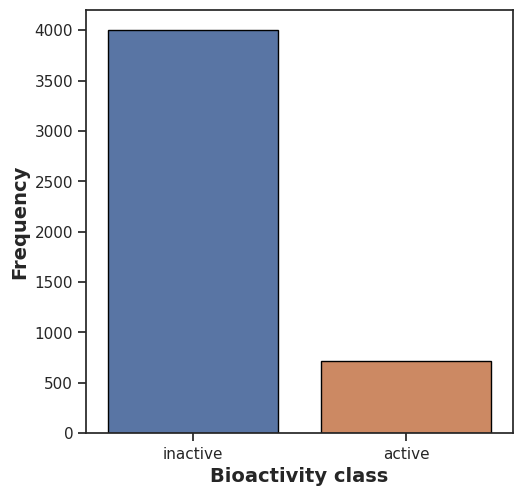

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that 1 bioactivity class is spanning more chemical spaces than the other as evident by the scatter plot of MW vs LogP.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


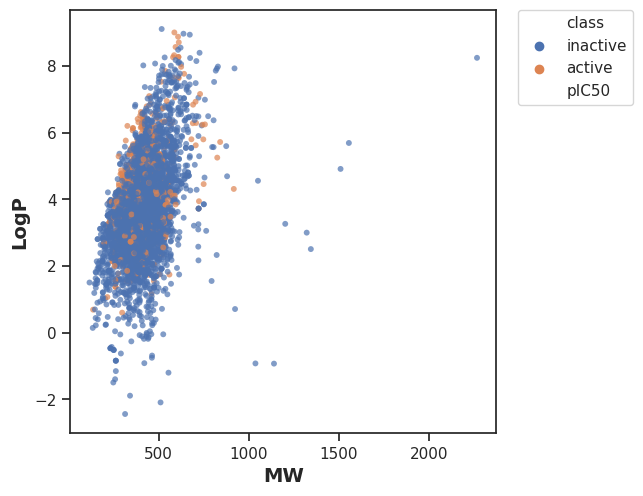

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')
plt.show()

### **Box plots**

#### **pIC50 value**

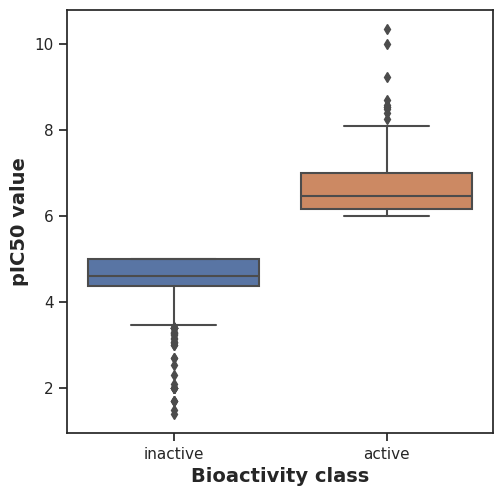

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [41]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [42]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,2854139.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

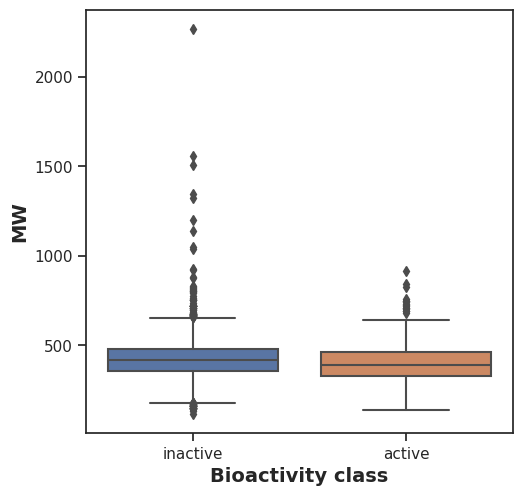

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [44]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1255434.5,2.988288e-07,0.05,Different distribution (reject H0)


#### **LogP**

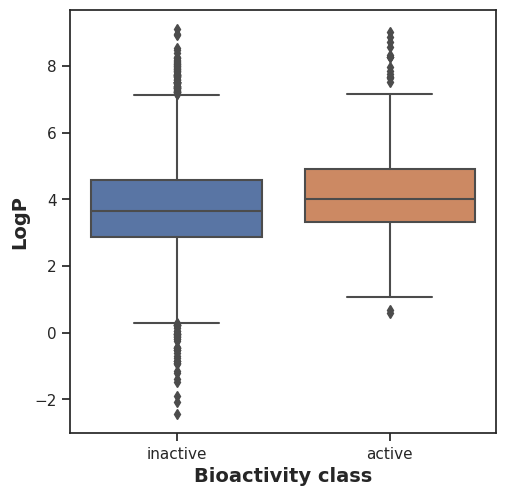

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [46]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1674341.5,1.555283e-13,0.05,Different distribution (reject H0)


#### **NumHDonors**

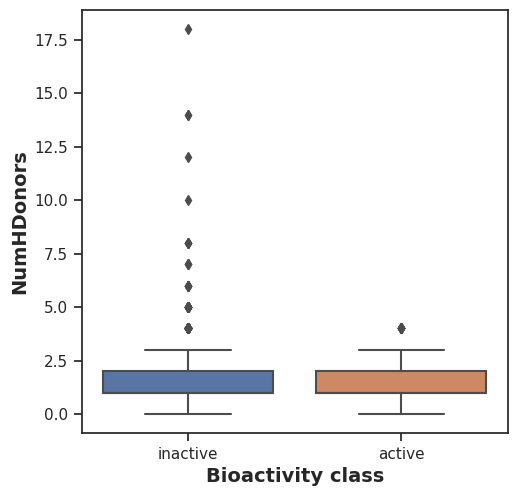

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [48]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1487777.5,0.05726,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

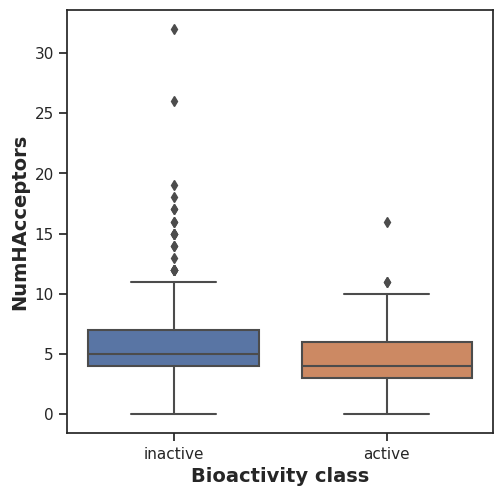

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [50]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1054415.5,2.373135e-29,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

3 (MW, LogP and NumHAcceptors) out of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives** while the NumHDonors descriptor exhibited ***no statistically significant difference*** between the **actives** and **inactives**

## **Zip files**

In [51]:
! zip -r results.zip . -i *.csv *.pdf

  adding: Cytochrome P450 2D6_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: Cytochrome P450 2D6_03_bioactivity_data_curated.csv (deflated 81%)
  adding: Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv (deflated 79%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 36%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 13%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: Cytochrome P450 2D6_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_pIC50.csv (deflated 7%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: Cytochrome P450 2D6_01_bioactivity_data_raw.csv (deflated 91%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 39%)


# **Descriptor Calculation and Dataset Preparation**
 Here, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. We will also be preparing this into a dataset for subsequent model building.

## **Download PaDEL-Descriptor**

In [52]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-06-27 02:29:23--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-06-27 02:29:23--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.07s   

2023-06-27 02:29:23 (336 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-06-27 02:29:23--  https://github

In [53]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Load bioactivity data**

Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [55]:
df6 = pd.read_csv('Cytochrome P450 2D6_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df6

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,639.506,5.05580,2.0,13.0,6.619789
1,1,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,636.506,5.75962,2.0,13.0,6.619789
2,2,CHEMBL156813,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,612.480,4.86850,2.0,12.0,6.619789
3,3,CHEMBL13771,CCc1c2c(nc3cnc(C#CCN(C)C)cc13)-c1cc3c(c(=O)n1C...,intermediate,458.518,1.95010,1.0,8.0,5.875822
4,4,CHEMBL65,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3ccccc3nc2-1,active,348.358,2.07960,1.0,6.0,6.154902
...,...,...,...,...,...,...,...,...,...
535,535,CHEMBL5201567,O=C(CCCCCOc1ccc(-c2nc3ccccc3c3cc(-c4ccccc4)nn2...,inactive,466.541,5.66110,2.0,6.0,4.779892
536,536,CHEMBL5192072,Cc1ccc(C/N=C2\NC(=O)/C(=C3\CCNC(=O)c4[nH]c5ccc...,inactive,416.506,3.74012,3.0,4.0,4.318759
537,537,CHEMBL5178704,Cc1ccc(C/N=C2\NC(=O)/C(=C3\CCNC(=O)c4[nH]ccc43...,inactive,366.446,2.58692,3.0,4.0,4.468521
538,538,CHEMBL5207189,Cc1c(Cl)cccc1Nc1ccc(F)cc1C(=O)NCc1ccc(O)c(O)c1,intermediate,400.837,4.87232,4.0,4.0,5.354578


In [56]:
selection = ['canonical_smiles','molecule_chembl_id']
df6_selection = df6[selection]
df6_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [57]:
! cat molecule.smi | head -5

COc1ccc(NS(=O)(=O)c2ccc(Br)cc2)cc1N1CCN(C)CC1	CHEMBL292759
COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNCC1.Cl	CHEMBL542139
CC(C)C[C@H](C=O)NC(=O)[C@@H](NS(=O)(=O)c1ccc(F)cc1)C(C)C	CHEMBL168471
O=C(N[C@H]1c2ccccc2OC[C@H]1O)[C@H](Cc1ccccc1)C[C@H](O)CN1CCN(Cc2ccc(-c3cccnc3)o2)C[C@H]1C(=O)NCC(F)(F)F	CHEMBL3706623
CC(C)(C)NC(=O)[C@@H]1CN(Cc2cccnc2)CCN1C[C@@H](O)C[C@@H](Cc1ccccc1)C(=O)N[C@H]1c2ccccc2C[C@H]1O	CHEMBL115


In [58]:
! cat molecule.smi | wc -l

5907


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [59]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [60]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL528996 in molecule.smi (908/5907). Average speed: 0.18 s/mol.
Processing CHEMBL475684 in molecule.smi (909/5907). Average speed: 0.18 s/mol.
Processing CHEMBL478902 in molecule.smi (910/5907). Average speed: 0.18 s/mol.
Processing CHEMBL478283 in molecule.smi (911/5907). Average speed: 0.18 s/mol.
Processing CHEMBL507731 in molecule.smi (912/5907). Average speed: 0.18 s/mol.
Processing CHEMBL470508 in molecule.smi (913/5907). Average speed: 0.18 s/mol.
Processing CHEMBL486045 in molecule.smi (914/5907). Average speed: 0.18 s/mol.
Processing CHEMBL495075 in molecule.smi (915/5907). Average speed: 0.18 s/mol.
Processing CHEMBL480501 in molecule.smi (916/5907). Average speed: 0.18 s/mol.
Processing CHEMBL453329 in molecule.smi (917/5907). Average speed: 0.18 s/mol.
Processing CHEMBL449192 in molecule.smi (918/5907). Average speed: 0.18 s/mol.
Processing CHEMBL453587 in molecule.smi (920/5907). Average speed: 0.18 s/mol.
P

In [61]:
! ls -l

total 126240
-rw-r--r-- 1 root root  3479480 Jun 27 01:53 'Cytochrome P450 2D6_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root   452012 Jun 27 01:58 'Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root   508519 Jun 27 01:59 'Cytochrome P450 2D6_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root   831527 Jun 27 02:11 'Cytochrome P450 2D6_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root   658801 Jun 27 02:12 'Cytochrome P450 2D6_05_bioactivity_data_2class_pIC50.csv'
-rw-r--r-- 1 root root   507320 Jun 27 01:59  Cytochrome.zip
-rw-r--r-- 1 root root 10512018 Jun 27 02:47  descriptors_output.csv
drwxr-xr-x 3 root root     4096 Jun 27 02:29  __MACOSX
-rw-r--r-- 1 root root      126 Jun 27 02:25  mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      124 Jun 27 02:23  mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      135 Jun 27 02:27  mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      131 Jun 27 02:25  mannwhitneyu_NumHDonors.csv
-rw-r--r-- 

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [62]:
df6_X = pd.read_csv('descriptors_output.csv')

In [63]:
df6_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL292759,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL542139,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL168471,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL115,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3706623,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,CHEMBL5182446,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5903,CHEMBL5199199,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5904,CHEMBL5193325,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5905,CHEMBL5187508,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df6_X = df6_X.drop(columns=['Name'])
df6_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5903,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5904,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5905,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [65]:
df6_Y = df6['pIC50']
df6_Y

0       4.958607
1       4.494850
2       3.536107
3       5.193820
4       4.522879
          ...   
5902    4.522879
5903    4.522879
5904    4.522879
5905    4.522879
5906    5.000000
Name: pIC50, Length: 5907, dtype: float64

## **Combining X and Y variable**

In [66]:
dataset6 = pd.concat([df6_X,df6_Y], axis=1)
dataset6

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.494850
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.536107
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.193820
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
5903,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
5904,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
5905,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879


In [67]:
dataset6.to_csv('Cytochrome P450 2D6_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)